# II -  K-Folds (cross-validation)

## Importar librerias

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

from tensorflow.keras.metrics import MSE
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import binary_crossentropy

from sklearn.model_selection import KFold

## Parametros de entrenamiento

In [3]:
lr = 0.001
epochs = 300
batch_size = 16
k = 5

np.random.seed(14)

## Cargar y visualizar el dataset

In [4]:
# Load data
dataset = np.loadtxt('./src/pima-indians-diabetes.csv', delimiter=',')

In [5]:
features = dataset.shape[1]-1

## Crear el modelo

In [6]:
# Model
#---------------------------------------------------------------------#
input_1 = Input(shape=[features]) #data shape, excepting numer of examples
dense_1 = Dense(10, activation='relu')(input_1)
dense_2 = Dense(10, activation='relu')(dense_1)
output_1 = Dense(1, activation='sigmoid')(dense_2)
#---------------------------------------------------------------------#
model = Model(input_1, output_1)
#---------------------------------------------------------------------#

In [11]:
sgd_optimizer = SGD(lr=lr, decay=1e-6, momentum=0.9, nesterov=False)
adam_optimizer = Adam(learning_rate=lr)
model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['acc', 'mse'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 10)                90        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


/home/enmariotti/miniconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


## Folding & Entrenamiento

In [8]:
start_time = time.time()
acc = np.zeros((k, epochs))
kfolds = KFold(n_splits=k, shuffle=True, random_state=None)
for i, (train_index, test_index) in enumerate(kfolds.split(dataset)):
    x_train, x_test = dataset[train_index, 0:8], dataset[test_index, 0:8]
    y_train, y_test = dataset[train_index, 8], dataset[test_index, 8]
    history_fold = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), shuffle=True, verbose=1)
    acc[i,:] = np.array(history_fold.history['val_acc'])
end_time = time.time()
print('\nElapsed Dense Model training time: {:.5f} seconds'.format(end_time-start_time))

Epoch 1/300
39/39 [==============================] - 2s 11ms/step - loss: 4.6264 - acc: 0.5033 - mse: 0.4452 - val_loss: 1.4805 - val_acc: 0.6104 - val_mse: 0.3120
Epoch 2/300
39/39 [==============================] - 0s 5ms/step - loss: 2.3055 - acc: 0.5277 - mse: 0.3731 - val_loss: 0.8927 - val_acc: 0.6169 - val_mse: 0.2575
Epoch 3/300
39/39 [==============================] - 0s 5ms/step - loss: 1.3720 - acc: 0.5244 - mse: 0.3214 - val_loss: 0.6710 - val_acc: 0.6299 - val_mse: 0.2287
Epoch 4/300
39/39 [==============================] - 0s 5ms/step - loss: 0.9093 - acc: 0.5456 - mse: 0.2893 - val_loss: 0.6184 - val_acc: 0.6558 - val_mse: 0.2124
Epoch 5/300
39/39 [==============================] - 0s 5ms/step - loss: 0.7636 - acc: 0.5700 - mse: 0.2643 - val_loss: 0.5836 - val_acc: 0.6753 - val_mse: 0.1987
Epoch 6/300
39/39 [==============================] - 0s 5ms/step - loss: 0.7201 - acc: 0.5879 - mse: 0.2483 - val_loss: 0.6019 - val_acc: 0.6818 - val_mse: 0.2071
Epoch 7/300
39/39 [==

39/39 [==============================] - 0s 5ms/step - loss: 0.5889 - acc: 0.6922 - mse: 0.2006 - val_loss: 0.5750 - val_acc: 0.6948 - val_mse: 0.1954
Epoch 52/300
39/39 [==============================] - 0s 5ms/step - loss: 0.5875 - acc: 0.6938 - mse: 0.2006 - val_loss: 0.5735 - val_acc: 0.7013 - val_mse: 0.1946
Epoch 53/300
39/39 [==============================] - 0s 5ms/step - loss: 0.5894 - acc: 0.7085 - mse: 0.2000 - val_loss: 0.5855 - val_acc: 0.6883 - val_mse: 0.1998
Epoch 54/300
39/39 [==============================] - 0s 5ms/step - loss: 0.5886 - acc: 0.6971 - mse: 0.2006 - val_loss: 0.5720 - val_acc: 0.6948 - val_mse: 0.1939
Epoch 55/300
39/39 [==============================] - 0s 5ms/step - loss: 0.5832 - acc: 0.7003 - mse: 0.1987 - val_loss: 0.5546 - val_acc: 0.7208 - val_mse: 0.1862
Epoch 56/300
39/39 [==============================] - 0s 4ms/step - loss: 0.5877 - acc: 0.7052 - mse: 0.1998 - val_loss: 0.5937 - val_acc: 0.6883 - val_mse: 0.2032
Epoch 57/300
39/39 [=========

39/39 [==============================] - 0s 5ms/step - loss: 0.5528 - acc: 0.7329 - mse: 0.1854 - val_loss: 0.5191 - val_acc: 0.7013 - val_mse: 0.1728
Epoch 102/300
39/39 [==============================] - 0s 4ms/step - loss: 0.5462 - acc: 0.7215 - mse: 0.1827 - val_loss: 0.5802 - val_acc: 0.7013 - val_mse: 0.1959
Epoch 103/300
39/39 [==============================] - 0s 4ms/step - loss: 0.5452 - acc: 0.7264 - mse: 0.1823 - val_loss: 0.5509 - val_acc: 0.7013 - val_mse: 0.1866
Epoch 104/300
39/39 [==============================] - 0s 5ms/step - loss: 0.5476 - acc: 0.7150 - mse: 0.1834 - val_loss: 0.5537 - val_acc: 0.6818 - val_mse: 0.1872
Epoch 105/300
39/39 [==============================] - 0s 5ms/step - loss: 0.5451 - acc: 0.7296 - mse: 0.1824 - val_loss: 0.5533 - val_acc: 0.7078 - val_mse: 0.1870
Epoch 106/300
39/39 [==============================] - 0s 5ms/step - loss: 0.5489 - acc: 0.7166 - mse: 0.1829 - val_loss: 0.5624 - val_acc: 0.6883 - val_mse: 0.1911
Epoch 107/300
39/39 [===

Epoch 151/300
39/39 [==============================] - 0s 5ms/step - loss: 0.5208 - acc: 0.7508 - mse: 0.1721 - val_loss: 0.5379 - val_acc: 0.6883 - val_mse: 0.1825
Epoch 152/300
39/39 [==============================] - 0s 5ms/step - loss: 0.5186 - acc: 0.7524 - mse: 0.1713 - val_loss: 0.5276 - val_acc: 0.6948 - val_mse: 0.1788
Epoch 153/300
39/39 [==============================] - 0s 5ms/step - loss: 0.5211 - acc: 0.7606 - mse: 0.1725 - val_loss: 0.5284 - val_acc: 0.7013 - val_mse: 0.1780
Epoch 154/300
39/39 [==============================] - 0s 5ms/step - loss: 0.5228 - acc: 0.7655 - mse: 0.1726 - val_loss: 0.5388 - val_acc: 0.6818 - val_mse: 0.1829
Epoch 155/300
39/39 [==============================] - 0s 5ms/step - loss: 0.5202 - acc: 0.7573 - mse: 0.1719 - val_loss: 0.5233 - val_acc: 0.7078 - val_mse: 0.1765
Epoch 156/300
39/39 [==============================] - 0s 5ms/step - loss: 0.5206 - acc: 0.7524 - mse: 0.1723 - val_loss: 0.5410 - val_acc: 0.6753 - val_mse: 0.1837
Epoch 157/

Epoch 201/300
39/39 [==============================] - 0s 5ms/step - loss: 0.5099 - acc: 0.7655 - mse: 0.1681 - val_loss: 0.5179 - val_acc: 0.7078 - val_mse: 0.1748
Epoch 202/300
39/39 [==============================] - 0s 5ms/step - loss: 0.5092 - acc: 0.7476 - mse: 0.1685 - val_loss: 0.5243 - val_acc: 0.7013 - val_mse: 0.1769
Epoch 203/300
39/39 [==============================] - 0s 5ms/step - loss: 0.5078 - acc: 0.7720 - mse: 0.1673 - val_loss: 0.5268 - val_acc: 0.6948 - val_mse: 0.1785
Epoch 204/300
39/39 [==============================] - 0s 5ms/step - loss: 0.5072 - acc: 0.7655 - mse: 0.1663 - val_loss: 0.5612 - val_acc: 0.6883 - val_mse: 0.1893
Epoch 205/300
39/39 [==============================] - 0s 5ms/step - loss: 0.5086 - acc: 0.7557 - mse: 0.1683 - val_loss: 0.5221 - val_acc: 0.7013 - val_mse: 0.1764
Epoch 206/300
39/39 [==============================] - 0s 5ms/step - loss: 0.5104 - acc: 0.7573 - mse: 0.1681 - val_loss: 0.5517 - val_acc: 0.6948 - val_mse: 0.1873
Epoch 207/

Epoch 251/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4949 - acc: 0.7655 - mse: 0.1623 - val_loss: 0.5414 - val_acc: 0.7143 - val_mse: 0.1825
Epoch 252/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4948 - acc: 0.7704 - mse: 0.1626 - val_loss: 0.5095 - val_acc: 0.7143 - val_mse: 0.1713
Epoch 253/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4910 - acc: 0.7655 - mse: 0.1607 - val_loss: 0.5461 - val_acc: 0.7208 - val_mse: 0.1838
Epoch 254/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4955 - acc: 0.7622 - mse: 0.1628 - val_loss: 0.4993 - val_acc: 0.7273 - val_mse: 0.1675
Epoch 255/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4980 - acc: 0.7769 - mse: 0.1631 - val_loss: 0.5105 - val_acc: 0.7208 - val_mse: 0.1719
Epoch 256/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4963 - acc: 0.7606 - mse: 0.1630 - val_loss: 0.4884 - val_acc: 0.7338 - val_mse: 0.1627
Epoch 257/

Epoch 1/300
39/39 [==============================] - 0s 6ms/step - loss: 0.5367 - acc: 0.7345 - mse: 0.1791 - val_loss: 0.4200 - val_acc: 0.8117 - val_mse: 0.1314
Epoch 2/300
39/39 [==============================] - 0s 4ms/step - loss: 0.5236 - acc: 0.7410 - mse: 0.1746 - val_loss: 0.4289 - val_acc: 0.8117 - val_mse: 0.1352
Epoch 3/300
39/39 [==============================] - 0s 5ms/step - loss: 0.5111 - acc: 0.7410 - mse: 0.1696 - val_loss: 0.4330 - val_acc: 0.8247 - val_mse: 0.1374
Epoch 4/300
39/39 [==============================] - 0s 5ms/step - loss: 0.5046 - acc: 0.7508 - mse: 0.1661 - val_loss: 0.4307 - val_acc: 0.7987 - val_mse: 0.1355
Epoch 5/300
39/39 [==============================] - 0s 4ms/step - loss: 0.5151 - acc: 0.7459 - mse: 0.1701 - val_loss: 0.4582 - val_acc: 0.7857 - val_mse: 0.1478
Epoch 6/300
39/39 [==============================] - 0s 4ms/step - loss: 0.5085 - acc: 0.7492 - mse: 0.1685 - val_loss: 0.4407 - val_acc: 0.8052 - val_mse: 0.1393
Epoch 7/300
39/39 [===

39/39 [==============================] - 0s 5ms/step - loss: 0.4971 - acc: 0.7573 - mse: 0.1635 - val_loss: 0.4450 - val_acc: 0.8052 - val_mse: 0.1381
Epoch 52/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4884 - acc: 0.7671 - mse: 0.1602 - val_loss: 0.4397 - val_acc: 0.8182 - val_mse: 0.1374
Epoch 53/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4882 - acc: 0.7541 - mse: 0.1610 - val_loss: 0.4478 - val_acc: 0.8052 - val_mse: 0.1394
Epoch 54/300
39/39 [==============================] - 0s 6ms/step - loss: 0.4861 - acc: 0.7622 - mse: 0.1600 - val_loss: 0.4501 - val_acc: 0.8117 - val_mse: 0.1416
Epoch 55/300
39/39 [==============================] - 0s 6ms/step - loss: 0.4889 - acc: 0.7590 - mse: 0.1602 - val_loss: 0.4584 - val_acc: 0.8182 - val_mse: 0.1451
Epoch 56/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4882 - acc: 0.7671 - mse: 0.1608 - val_loss: 0.4453 - val_acc: 0.8052 - val_mse: 0.1391
Epoch 57/300
39/39 [=========

39/39 [==============================] - 0s 4ms/step - loss: 0.4805 - acc: 0.7590 - mse: 0.1575 - val_loss: 0.4651 - val_acc: 0.7922 - val_mse: 0.1477
Epoch 102/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4787 - acc: 0.7720 - mse: 0.1554 - val_loss: 0.4526 - val_acc: 0.7987 - val_mse: 0.1416
Epoch 103/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4772 - acc: 0.7590 - mse: 0.1571 - val_loss: 0.4601 - val_acc: 0.7987 - val_mse: 0.1442
Epoch 104/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4752 - acc: 0.7704 - mse: 0.1545 - val_loss: 0.4472 - val_acc: 0.8052 - val_mse: 0.1397
Epoch 105/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4719 - acc: 0.7606 - mse: 0.1543 - val_loss: 0.4602 - val_acc: 0.8377 - val_mse: 0.1433
Epoch 106/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4714 - acc: 0.7687 - mse: 0.1538 - val_loss: 0.4705 - val_acc: 0.7922 - val_mse: 0.1497
Epoch 107/300
39/39 [===

Epoch 151/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4746 - acc: 0.7687 - mse: 0.1546 - val_loss: 0.4807 - val_acc: 0.7922 - val_mse: 0.1527
Epoch 152/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4699 - acc: 0.7785 - mse: 0.1522 - val_loss: 0.4560 - val_acc: 0.7922 - val_mse: 0.1420
Epoch 153/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4719 - acc: 0.7671 - mse: 0.1538 - val_loss: 0.4593 - val_acc: 0.8052 - val_mse: 0.1428
Epoch 154/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4775 - acc: 0.7622 - mse: 0.1561 - val_loss: 0.4522 - val_acc: 0.8442 - val_mse: 0.1401
Epoch 155/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4673 - acc: 0.7752 - mse: 0.1523 - val_loss: 0.4542 - val_acc: 0.8117 - val_mse: 0.1419
Epoch 156/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4616 - acc: 0.7752 - mse: 0.1496 - val_loss: 0.4517 - val_acc: 0.8312 - val_mse: 0.1403
Epoch 157/

Epoch 201/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4655 - acc: 0.7850 - mse: 0.1507 - val_loss: 0.4610 - val_acc: 0.8182 - val_mse: 0.1460
Epoch 202/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4653 - acc: 0.7866 - mse: 0.1513 - val_loss: 0.4622 - val_acc: 0.8312 - val_mse: 0.1432
Epoch 203/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4625 - acc: 0.7752 - mse: 0.1505 - val_loss: 0.4621 - val_acc: 0.8377 - val_mse: 0.1439
Epoch 204/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4580 - acc: 0.7834 - mse: 0.1483 - val_loss: 0.4789 - val_acc: 0.8052 - val_mse: 0.1520
Epoch 205/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4595 - acc: 0.7801 - mse: 0.1484 - val_loss: 0.4785 - val_acc: 0.7792 - val_mse: 0.1521
Epoch 206/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4706 - acc: 0.7769 - mse: 0.1539 - val_loss: 0.4693 - val_acc: 0.7857 - val_mse: 0.1469
Epoch 207/

Epoch 251/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4523 - acc: 0.7866 - mse: 0.1457 - val_loss: 0.4697 - val_acc: 0.7987 - val_mse: 0.1476
Epoch 252/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4531 - acc: 0.7834 - mse: 0.1460 - val_loss: 0.4549 - val_acc: 0.8117 - val_mse: 0.1402
Epoch 253/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4514 - acc: 0.7883 - mse: 0.1462 - val_loss: 0.4856 - val_acc: 0.7857 - val_mse: 0.1557
Epoch 254/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4573 - acc: 0.7850 - mse: 0.1464 - val_loss: 0.4599 - val_acc: 0.8052 - val_mse: 0.1425
Epoch 255/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4587 - acc: 0.7687 - mse: 0.1491 - val_loss: 0.4735 - val_acc: 0.7922 - val_mse: 0.1497
Epoch 256/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4590 - acc: 0.7850 - mse: 0.1479 - val_loss: 0.4716 - val_acc: 0.8052 - val_mse: 0.1483
Epoch 257/

Epoch 1/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4701 - acc: 0.7590 - mse: 0.1532 - val_loss: 0.4008 - val_acc: 0.8182 - val_mse: 0.1251
Epoch 2/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4737 - acc: 0.7720 - mse: 0.1530 - val_loss: 0.3864 - val_acc: 0.8571 - val_mse: 0.1186
Epoch 3/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4733 - acc: 0.7801 - mse: 0.1530 - val_loss: 0.3908 - val_acc: 0.8442 - val_mse: 0.1209
Epoch 4/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4828 - acc: 0.7573 - mse: 0.1571 - val_loss: 0.3810 - val_acc: 0.8506 - val_mse: 0.1169
Epoch 5/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4700 - acc: 0.7785 - mse: 0.1519 - val_loss: 0.3892 - val_acc: 0.8506 - val_mse: 0.1204
Epoch 6/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4719 - acc: 0.7704 - mse: 0.1539 - val_loss: 0.3864 - val_acc: 0.8442 - val_mse: 0.1190
Epoch 7/300
39/39 [===

39/39 [==============================] - 0s 5ms/step - loss: 0.4571 - acc: 0.7801 - mse: 0.1468 - val_loss: 0.4352 - val_acc: 0.8182 - val_mse: 0.1390
Epoch 52/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4600 - acc: 0.7801 - mse: 0.1493 - val_loss: 0.4677 - val_acc: 0.7662 - val_mse: 0.1531
Epoch 53/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4564 - acc: 0.7899 - mse: 0.1477 - val_loss: 0.4268 - val_acc: 0.8182 - val_mse: 0.1357
Epoch 54/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4599 - acc: 0.7883 - mse: 0.1489 - val_loss: 0.4516 - val_acc: 0.7987 - val_mse: 0.1456
Epoch 55/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4551 - acc: 0.7834 - mse: 0.1476 - val_loss: 0.4298 - val_acc: 0.8117 - val_mse: 0.1365
Epoch 56/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4617 - acc: 0.7850 - mse: 0.1481 - val_loss: 0.4465 - val_acc: 0.7987 - val_mse: 0.1446
Epoch 57/300
39/39 [=========

39/39 [==============================] - 0s 5ms/step - loss: 0.4520 - acc: 0.7801 - mse: 0.1468 - val_loss: 0.4522 - val_acc: 0.8117 - val_mse: 0.1432
Epoch 102/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4516 - acc: 0.7899 - mse: 0.1457 - val_loss: 0.4779 - val_acc: 0.8052 - val_mse: 0.1547
Epoch 103/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4505 - acc: 0.7932 - mse: 0.1459 - val_loss: 0.4685 - val_acc: 0.8052 - val_mse: 0.1506
Epoch 104/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4477 - acc: 0.7883 - mse: 0.1449 - val_loss: 0.4664 - val_acc: 0.8182 - val_mse: 0.1499
Epoch 105/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4581 - acc: 0.7801 - mse: 0.1475 - val_loss: 0.4644 - val_acc: 0.8117 - val_mse: 0.1491
Epoch 106/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4549 - acc: 0.7850 - mse: 0.1462 - val_loss: 0.4691 - val_acc: 0.8052 - val_mse: 0.1502
Epoch 107/300
39/39 [===

Epoch 151/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4438 - acc: 0.7932 - mse: 0.1428 - val_loss: 0.4802 - val_acc: 0.7987 - val_mse: 0.1533
Epoch 152/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4683 - acc: 0.7687 - mse: 0.1512 - val_loss: 0.4770 - val_acc: 0.8182 - val_mse: 0.1521
Epoch 153/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4423 - acc: 0.7997 - mse: 0.1419 - val_loss: 0.4882 - val_acc: 0.7987 - val_mse: 0.1565
Epoch 154/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4588 - acc: 0.7801 - mse: 0.1482 - val_loss: 0.4796 - val_acc: 0.8052 - val_mse: 0.1523
Epoch 155/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4521 - acc: 0.7883 - mse: 0.1443 - val_loss: 0.4738 - val_acc: 0.8117 - val_mse: 0.1492
Epoch 156/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4462 - acc: 0.7850 - mse: 0.1433 - val_loss: 0.4852 - val_acc: 0.7922 - val_mse: 0.1559
Epoch 157/

Epoch 201/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4521 - acc: 0.7915 - mse: 0.1448 - val_loss: 0.5012 - val_acc: 0.7857 - val_mse: 0.1611
Epoch 202/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4515 - acc: 0.7883 - mse: 0.1457 - val_loss: 0.4954 - val_acc: 0.7987 - val_mse: 0.1550
Epoch 203/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4413 - acc: 0.7932 - mse: 0.1424 - val_loss: 0.4928 - val_acc: 0.8182 - val_mse: 0.1530
Epoch 204/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4391 - acc: 0.8046 - mse: 0.1398 - val_loss: 0.5021 - val_acc: 0.7727 - val_mse: 0.1607
Epoch 205/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4444 - acc: 0.7883 - mse: 0.1434 - val_loss: 0.4802 - val_acc: 0.7987 - val_mse: 0.1539
Epoch 206/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4430 - acc: 0.7883 - mse: 0.1429 - val_loss: 0.4915 - val_acc: 0.8182 - val_mse: 0.1530
Epoch 207/

Epoch 251/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4347 - acc: 0.8013 - mse: 0.1391 - val_loss: 0.5128 - val_acc: 0.7922 - val_mse: 0.1625
Epoch 252/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4518 - acc: 0.7964 - mse: 0.1451 - val_loss: 0.5076 - val_acc: 0.7987 - val_mse: 0.1600
Epoch 253/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4449 - acc: 0.7834 - mse: 0.1436 - val_loss: 0.5025 - val_acc: 0.8052 - val_mse: 0.1593
Epoch 254/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4400 - acc: 0.7948 - mse: 0.1416 - val_loss: 0.4977 - val_acc: 0.8247 - val_mse: 0.1559
Epoch 255/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4399 - acc: 0.7964 - mse: 0.1410 - val_loss: 0.5121 - val_acc: 0.7987 - val_mse: 0.1571
Epoch 256/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4507 - acc: 0.7932 - mse: 0.1465 - val_loss: 0.5110 - val_acc: 0.7727 - val_mse: 0.1590
Epoch 257/

Epoch 1/300
39/39 [==============================] - 0s 6ms/step - loss: 0.4645 - acc: 0.7870 - mse: 0.1488 - val_loss: 0.4611 - val_acc: 0.8039 - val_mse: 0.1483
Epoch 2/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4511 - acc: 0.7805 - mse: 0.1451 - val_loss: 0.4812 - val_acc: 0.8039 - val_mse: 0.1553
Epoch 3/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4601 - acc: 0.7870 - mse: 0.1489 - val_loss: 0.5200 - val_acc: 0.7908 - val_mse: 0.1675
Epoch 4/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4471 - acc: 0.7837 - mse: 0.1452 - val_loss: 0.5531 - val_acc: 0.7582 - val_mse: 0.1797
Epoch 5/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4393 - acc: 0.8098 - mse: 0.1408 - val_loss: 0.5110 - val_acc: 0.7843 - val_mse: 0.1627
Epoch 6/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4417 - acc: 0.8033 - mse: 0.1400 - val_loss: 0.5208 - val_acc: 0.7712 - val_mse: 0.1667
Epoch 7/300
39/39 [===

39/39 [==============================] - 0s 5ms/step - loss: 0.4206 - acc: 0.8000 - mse: 0.1360 - val_loss: 0.5188 - val_acc: 0.7908 - val_mse: 0.1696
Epoch 52/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4121 - acc: 0.7935 - mse: 0.1324 - val_loss: 0.5186 - val_acc: 0.7908 - val_mse: 0.1672
Epoch 53/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4130 - acc: 0.8098 - mse: 0.1331 - val_loss: 0.4967 - val_acc: 0.7908 - val_mse: 0.1625
Epoch 54/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4195 - acc: 0.8016 - mse: 0.1352 - val_loss: 0.6284 - val_acc: 0.7582 - val_mse: 0.1893
Epoch 55/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4331 - acc: 0.7919 - mse: 0.1405 - val_loss: 0.6988 - val_acc: 0.6928 - val_mse: 0.2135
Epoch 56/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4154 - acc: 0.8049 - mse: 0.1333 - val_loss: 0.4840 - val_acc: 0.7974 - val_mse: 0.1584
Epoch 57/300
39/39 [=========

39/39 [==============================] - 0s 5ms/step - loss: 0.4161 - acc: 0.8049 - mse: 0.1344 - val_loss: 0.6160 - val_acc: 0.7320 - val_mse: 0.1940
Epoch 102/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4185 - acc: 0.7935 - mse: 0.1355 - val_loss: 0.5484 - val_acc: 0.7712 - val_mse: 0.1777
Epoch 103/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4076 - acc: 0.8130 - mse: 0.1309 - val_loss: 0.5974 - val_acc: 0.7255 - val_mse: 0.1937
Epoch 104/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4110 - acc: 0.8016 - mse: 0.1323 - val_loss: 0.5354 - val_acc: 0.7582 - val_mse: 0.1746
Epoch 105/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4145 - acc: 0.7951 - mse: 0.1343 - val_loss: 0.5345 - val_acc: 0.7516 - val_mse: 0.1748
Epoch 106/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4087 - acc: 0.8179 - mse: 0.1313 - val_loss: 0.5672 - val_acc: 0.7320 - val_mse: 0.1845
Epoch 107/300
39/39 [===

Epoch 151/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4036 - acc: 0.8081 - mse: 0.1299 - val_loss: 0.5296 - val_acc: 0.7647 - val_mse: 0.1731
Epoch 152/300
39/39 [==============================] - 0s 5ms/step - loss: 0.3991 - acc: 0.8146 - mse: 0.1262 - val_loss: 0.5649 - val_acc: 0.7124 - val_mse: 0.1855
Epoch 153/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4119 - acc: 0.8130 - mse: 0.1322 - val_loss: 0.5842 - val_acc: 0.7320 - val_mse: 0.1875
Epoch 154/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4132 - acc: 0.8065 - mse: 0.1328 - val_loss: 0.5788 - val_acc: 0.7190 - val_mse: 0.1898
Epoch 155/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4084 - acc: 0.8033 - mse: 0.1314 - val_loss: 0.6082 - val_acc: 0.6993 - val_mse: 0.1991
Epoch 156/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4074 - acc: 0.8098 - mse: 0.1309 - val_loss: 0.6334 - val_acc: 0.7255 - val_mse: 0.1925
Epoch 157/

Epoch 201/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4095 - acc: 0.8049 - mse: 0.1322 - val_loss: 0.5802 - val_acc: 0.6993 - val_mse: 0.1927
Epoch 202/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4010 - acc: 0.7984 - mse: 0.1291 - val_loss: 0.5921 - val_acc: 0.7190 - val_mse: 0.1921
Epoch 203/300
39/39 [==============================] - 0s 4ms/step - loss: 0.3923 - acc: 0.8228 - mse: 0.1246 - val_loss: 0.5468 - val_acc: 0.7255 - val_mse: 0.1807
Epoch 204/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4010 - acc: 0.8000 - mse: 0.1286 - val_loss: 0.6137 - val_acc: 0.6928 - val_mse: 0.2009
Epoch 205/300
39/39 [==============================] - 0s 5ms/step - loss: 0.3959 - acc: 0.8130 - mse: 0.1268 - val_loss: 0.5503 - val_acc: 0.7647 - val_mse: 0.1734
Epoch 206/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4082 - acc: 0.8081 - mse: 0.1304 - val_loss: 0.6012 - val_acc: 0.7124 - val_mse: 0.1967
Epoch 207/

Epoch 251/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4024 - acc: 0.8211 - mse: 0.1288 - val_loss: 0.5830 - val_acc: 0.7255 - val_mse: 0.1869
Epoch 252/300
39/39 [==============================] - 0s 5ms/step - loss: 0.3962 - acc: 0.8114 - mse: 0.1269 - val_loss: 0.5993 - val_acc: 0.7059 - val_mse: 0.1981
Epoch 253/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4061 - acc: 0.8114 - mse: 0.1311 - val_loss: 0.5419 - val_acc: 0.7516 - val_mse: 0.1764
Epoch 254/300
39/39 [==============================] - 0s 5ms/step - loss: 0.3959 - acc: 0.8163 - mse: 0.1267 - val_loss: 0.5750 - val_acc: 0.7255 - val_mse: 0.1857
Epoch 255/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4002 - acc: 0.8065 - mse: 0.1298 - val_loss: 0.5434 - val_acc: 0.7451 - val_mse: 0.1764
Epoch 256/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4013 - acc: 0.8049 - mse: 0.1289 - val_loss: 0.5576 - val_acc: 0.7451 - val_mse: 0.1828
Epoch 257/

Epoch 1/300
39/39 [==============================] - 0s 9ms/step - loss: 0.4522 - acc: 0.8065 - mse: 0.1433 - val_loss: 0.4269 - val_acc: 0.7974 - val_mse: 0.1383
Epoch 2/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4423 - acc: 0.8016 - mse: 0.1412 - val_loss: 0.4586 - val_acc: 0.7582 - val_mse: 0.1511
Epoch 3/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4434 - acc: 0.8098 - mse: 0.1410 - val_loss: 0.4273 - val_acc: 0.7778 - val_mse: 0.1412
Epoch 4/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4346 - acc: 0.8033 - mse: 0.1400 - val_loss: 0.4486 - val_acc: 0.7908 - val_mse: 0.1478
Epoch 5/300
39/39 [==============================] - 0s 6ms/step - loss: 0.4449 - acc: 0.8016 - mse: 0.1426 - val_loss: 0.4423 - val_acc: 0.8039 - val_mse: 0.1441
Epoch 6/300
39/39 [==============================] - 0s 6ms/step - loss: 0.4433 - acc: 0.7984 - mse: 0.1413 - val_loss: 0.4563 - val_acc: 0.8039 - val_mse: 0.1474
Epoch 7/300
39/39 [===

39/39 [==============================] - 0s 5ms/step - loss: 0.4164 - acc: 0.8179 - mse: 0.1305 - val_loss: 0.4724 - val_acc: 0.7908 - val_mse: 0.1533
Epoch 52/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4232 - acc: 0.8098 - mse: 0.1357 - val_loss: 0.5181 - val_acc: 0.7647 - val_mse: 0.1651
Epoch 53/300
39/39 [==============================] - 0s 6ms/step - loss: 0.4299 - acc: 0.8033 - mse: 0.1382 - val_loss: 0.4672 - val_acc: 0.7582 - val_mse: 0.1545
Epoch 54/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4286 - acc: 0.8033 - mse: 0.1368 - val_loss: 0.4790 - val_acc: 0.7647 - val_mse: 0.1563
Epoch 55/300
39/39 [==============================] - 0s 6ms/step - loss: 0.4224 - acc: 0.8163 - mse: 0.1338 - val_loss: 0.4881 - val_acc: 0.7778 - val_mse: 0.1577
Epoch 56/300
39/39 [==============================] - 0s 6ms/step - loss: 0.4225 - acc: 0.8163 - mse: 0.1335 - val_loss: 0.4833 - val_acc: 0.7647 - val_mse: 0.1540
Epoch 57/300
39/39 [=========

39/39 [==============================] - 0s 5ms/step - loss: 0.4310 - acc: 0.8114 - mse: 0.1359 - val_loss: 0.5092 - val_acc: 0.7778 - val_mse: 0.1582
Epoch 102/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4162 - acc: 0.8098 - mse: 0.1323 - val_loss: 0.5264 - val_acc: 0.7647 - val_mse: 0.1628
Epoch 103/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4250 - acc: 0.8211 - mse: 0.1323 - val_loss: 0.5387 - val_acc: 0.7712 - val_mse: 0.1635
Epoch 104/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4228 - acc: 0.8033 - mse: 0.1345 - val_loss: 0.5202 - val_acc: 0.7778 - val_mse: 0.1616
Epoch 105/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4151 - acc: 0.8195 - mse: 0.1314 - val_loss: 0.5158 - val_acc: 0.7843 - val_mse: 0.1586
Epoch 106/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4185 - acc: 0.8163 - mse: 0.1334 - val_loss: 0.5377 - val_acc: 0.7582 - val_mse: 0.1649
Epoch 107/300
39/39 [===

Epoch 151/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4170 - acc: 0.8081 - mse: 0.1328 - val_loss: 0.5249 - val_acc: 0.7582 - val_mse: 0.1621
Epoch 152/300
39/39 [==============================] - 0s 6ms/step - loss: 0.4099 - acc: 0.8244 - mse: 0.1300 - val_loss: 0.5196 - val_acc: 0.7843 - val_mse: 0.1586
Epoch 153/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4227 - acc: 0.8098 - mse: 0.1349 - val_loss: 0.5298 - val_acc: 0.7778 - val_mse: 0.1594
Epoch 154/300
39/39 [==============================] - 0s 6ms/step - loss: 0.4110 - acc: 0.8130 - mse: 0.1305 - val_loss: 0.5210 - val_acc: 0.7647 - val_mse: 0.1610
Epoch 155/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4233 - acc: 0.8081 - mse: 0.1353 - val_loss: 0.5264 - val_acc: 0.7843 - val_mse: 0.1612
Epoch 156/300
39/39 [==============================] - 0s 6ms/step - loss: 0.4145 - acc: 0.8114 - mse: 0.1314 - val_loss: 0.5249 - val_acc: 0.7712 - val_mse: 0.1600
Epoch 157/

Epoch 201/300
39/39 [==============================] - 0s 6ms/step - loss: 0.4141 - acc: 0.8179 - mse: 0.1314 - val_loss: 0.5240 - val_acc: 0.7582 - val_mse: 0.1642
Epoch 202/300
39/39 [==============================] - 0s 6ms/step - loss: 0.4198 - acc: 0.8130 - mse: 0.1348 - val_loss: 0.5522 - val_acc: 0.7647 - val_mse: 0.1699
Epoch 203/300
39/39 [==============================] - 0s 6ms/step - loss: 0.4251 - acc: 0.8130 - mse: 0.1339 - val_loss: 0.5673 - val_acc: 0.7647 - val_mse: 0.1727
Epoch 204/300
39/39 [==============================] - 0s 6ms/step - loss: 0.4136 - acc: 0.8195 - mse: 0.1311 - val_loss: 0.5338 - val_acc: 0.7712 - val_mse: 0.1664
Epoch 205/300
39/39 [==============================] - 0s 6ms/step - loss: 0.4106 - acc: 0.8211 - mse: 0.1293 - val_loss: 0.5286 - val_acc: 0.7647 - val_mse: 0.1637
Epoch 206/300
39/39 [==============================] - 0s 6ms/step - loss: 0.4108 - acc: 0.8065 - mse: 0.1305 - val_loss: 0.5270 - val_acc: 0.7516 - val_mse: 0.1648
Epoch 207/

Epoch 251/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4188 - acc: 0.8130 - mse: 0.1337 - val_loss: 0.5474 - val_acc: 0.7582 - val_mse: 0.1698
Epoch 252/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4187 - acc: 0.8098 - mse: 0.1329 - val_loss: 0.5471 - val_acc: 0.7712 - val_mse: 0.1671
Epoch 253/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4204 - acc: 0.8146 - mse: 0.1329 - val_loss: 0.5476 - val_acc: 0.7451 - val_mse: 0.1689
Epoch 254/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4071 - acc: 0.8260 - mse: 0.1287 - val_loss: 0.5263 - val_acc: 0.7647 - val_mse: 0.1627
Epoch 255/300
39/39 [==============================] - 0s 5ms/step - loss: 0.4159 - acc: 0.8065 - mse: 0.1334 - val_loss: 0.5495 - val_acc: 0.7451 - val_mse: 0.1698
Epoch 256/300
39/39 [==============================] - 0s 4ms/step - loss: 0.4238 - acc: 0.8130 - mse: 0.1357 - val_loss: 0.5441 - val_acc: 0.7255 - val_mse: 0.1683
Epoch 257/


Elapsed Dense Model training time: 289.92064 seconds


## Graficos

In [9]:
acc_mean = np.mean(acc, axis=0)
acc_std = np.std(acc, axis=0)

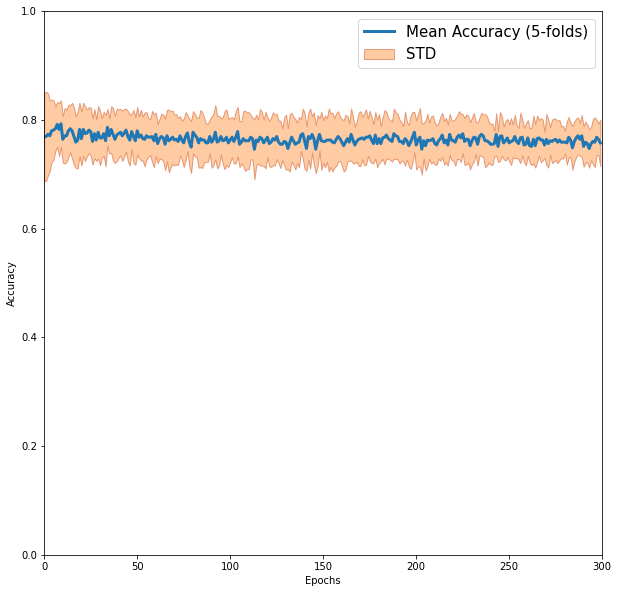

In [10]:
f = plt.figure(figsize=(10,10))
plt.plot(range(epochs),acc_mean, linewidth=3, label='Mean Accuracy (5-folds)')
plt.fill_between(range(epochs), acc_mean - acc_std,  acc_mean + acc_std, alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848', label='STD')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.axis([0, 300, 0, 1])
plt.legend(loc='best', fontsize=15)
plt.show()